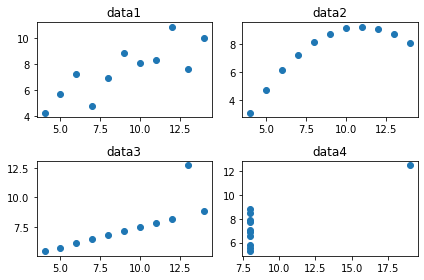

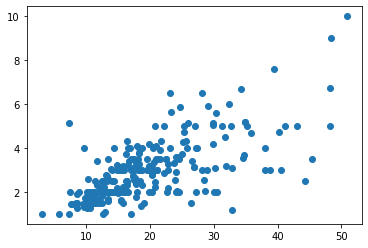

In [8]:
import pandas as pd
import numpy as np
df = pd.read_csv("gapminder.tsv", sep ='\t')
df
df.head()
df.columns
df.iloc[-1]
# 1.100, 1000번행 추출 
df.loc[1]
df.loc[[1,100,1000]]
df.head()
#df pop, year 열 
#[] 
df.loc[:,['year','pop']]
df.iloc[:,[2,4,-1]]
df.iloc[:,list(range(5))] #열이 list형
#list(range(5))
df.iloc[:,:3]
df.iloc[:,0:6:2] # 0번부터 6까지 2씩증가

#df 의 1번 10번 100번행의 2번 4번 열을 추출 
df.iloc[[1,10,100],[2,4]]
df.loc[[1,10,100],['year','pop']] 
df
#lifeExp 열을 연도별로 그룹화하여 평균을 구하여라 
df.groupby(by='year')['lifeExp'].mean()

#lifeExp, gdpPercap열의 평균값을 연도, 지역별로 그룹화하여 계산 
# 1952 asia 
#df.groupby(by=['year','continent'])['lifeExp','gdpPercap'].mean()
df.groupby(by=['year','continent'])[['lifeExp','gdpPercap']].mean()

#대륙별 국가의 개수 출력 
#df['country'].unique()
#df.groupby('continent')['country'].count()
df.groupby('continent')['country'].nunique() # 숫자는 앞에  n 

import seaborn as sns 
anscombe=sns.load_dataset("anscombe")
anscombe
#'통계치로만 데이터를 해석하지 말아라 ! dataset'
anscombe.describe()#기술통계 
anscombe #dataset 단위로  x 및 y의 평균을 출력 
# print(anscombe.groupby('dataset')[['x','y']].mean())
# print(anscombe.groupby('dataset')[['x','y']].std())
# print(anscombe.groupby('dataset')[['x','y']].var())

anscombe

import matplotlib.pyplot as plt

df1=anscombe[anscombe['dataset']=='I']
df2=anscombe[anscombe['dataset']=='II']
df3=anscombe[anscombe['dataset']=='III']
df4 =anscombe[anscombe['dataset']=='IV']

fig= plt.figure() 
axes1 = fig.add_subplot(2,2,1)#figure 종이 한장 axes 축 axis 축들
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)


axes1.plot(df1['x'],df1['y'],'o')
axes2.plot(df2['x'],df2['y'],'o')
axes3.plot(df3['x'],df3['y'],'o')
axes4.plot(df4['x'],df4['y'],'o')

axes1.set_title('data1')
axes2.set_title('data2')
axes3.set_title('data3')
axes4.set_title('data4')


fig.tight_layout()
fig

#feature enginnering(특성공학)
#기존변수 ->새로운 변수 생성..

sns.load_dataset('titanic').columns
# y = f(x)
# 점수 = f(공부시간)    종속변수 = f(독립변수)
#survived=f(pclass)


# mean()
# 특이값 (outlieres) = (q3-q1)*1.5 범위를 벗어나는 수 
# 특이값은 제거 

tips=sns.load_dataset('tips')
sp=plt.figure()
axes1 = sp.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'],tips['tip'])

#분산 공분산...
#상관계수 -1 0 1  0일수록 상관X 



In [27]:
df1=pd.read_csv('concat_1.csv')
df2=pd.read_csv('concat_2.csv')
df3=pd.read_csv('concat_3.csv')
df3

pd.concat([df1,df2,df3],ignore_index=True,axis=1)
#axis=0 default(행방향 연결)
#axis=1 default(열방향 연결)

person = pd.read_csv('survey_person.csv')
print(person)
print("="*50)

site = pd.read_csv('survey_site.csv')
print(site)
print("="*50)

survey = pd.read_csv('survey_survey.csv')
print(survey)
print("="*50)

visited = pd.read_csv('survey_visited.csv')
print(visited)
print("="*50)

visited


visitedSubset=visited.loc[[0,2,6],]
visitedSubset

ident   personal    family
0      dyer    William      Dyer
1        pb      Frank   Pabodie
2      lake   Anderson      Lake
3       roe  Valentina   Roerich
4  danforth      Frank  Danforth
    name    lat    long
0   DR-1 -49.85 -128.57
1   DR-3 -47.15 -126.72
2  MSK-4 -48.87 -123.40
    taken person quant  reading
0     619   dyer   rad     9.82
1     619   dyer   sal     0.13
2     622   dyer   rad     7.80
3     622   dyer   sal     0.09
4     734     pb   rad     8.41
5     734   lake   sal     0.05
6     734     pb  temp   -21.50
7     735     pb   rad     7.22
8     735    NaN   sal     0.06
9     735    NaN  temp   -26.00
10    751     pb   rad     4.35
11    751     pb  temp   -18.50
12    751   lake   sal     0.10
13    752   lake   rad     2.19
14    752   lake   sal     0.09
15    752   lake  temp   -16.00
16    752    roe   sal    41.60
17    837   lake   rad     1.46
18    837   lake   sal     0.21
19    837    roe   sal    22.50
20    844    roe   rad    11.25
   ident

,ident,site,dated
0,619,DR-1,1927-02-08
2,734,DR-3,1939-01-07
6,837,MSK-4,1932-01-14


In [31]:
visitedSubset=visited.loc[[0,2,6],]
visitedSubset


,ident,site,dated
0,619,DR-1,1927-02-08
2,734,DR-3,1939-01-07
6,837,MSK-4,1932-01-14


In [34]:
o2oMerge = site.merge(visitedSubset,left_on='name',right_on='site')
o2oMerge

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
2,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [44]:
#site 의 name과 visited의 site를 기준으로 머지
o2oMerge = site.merge(visited,left_on='name',right_on='site')
o2oMerge

# person의 ident와 survey의 person을 기준으로 병합
ps = person.merge(survey,left_on='ident',right_on='person')
ps


vs = visited.merge(survey,left_on='ident',right_on='taken')
vs

print(ps)
print('='*50)
print(vs)

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,-21.50
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


In [46]:
psvs=ps.merge(vs,left_on=['ident','taken','quant','reading'],right_on=['person','ident','quant','reading'])
psvs



,ident_x,personal,family,taken_x,person_x,quant,reading,ident_y,site,dated,taken_y,person_y
0,dyer,William,Dyer,619,dyer,rad,9.82,619,DR-1,1927-02-08,619,dyer
1,dyer,William,Dyer,619,dyer,sal,0.13,619,DR-1,1927-02-08,619,dyer
2,dyer,William,Dyer,622,dyer,rad,7.80,622,DR-1,1927-02-10,622,dyer
3,dyer,William,Dyer,622,dyer,sal,0.09,622,DR-1,1927-02-10,622,dyer
4,pb,Frank,Pabodie,734,pb,rad,8.41,734,DR-3,1939-01-07,734,pb
5,pb,Frank,Pabodie,734,pb,temp,-21.50,734,DR-3,1939-01-07,734,pb
6,pb,Frank,Pabodie,735,pb,rad,7.22,735,DR-3,1930-01-12,735,pb
7,pb,Frank,Pabodie,751,pb,rad,4.35,751,DR-3,1930-02-26,751,pb
8,pb,Frank,Pabodie,751,pb,temp,-18.50,751,DR-3,1930-02-26,751,pb
9,lake,Anderson,Lake,734,lake,sal,0.05,734,DR-3,1939-01-07,734,lake
